**Chapter 1 – The Machine Learning landscape**

_This is the code used to generate some of the figures in chapter 1._

In [116]:
# Python ≥3.5 is required
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import sys
assert sys.version_info >= (3, 5)

In [55]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [56]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in `datasets/lifesat`.

In [57]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [58]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [59]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

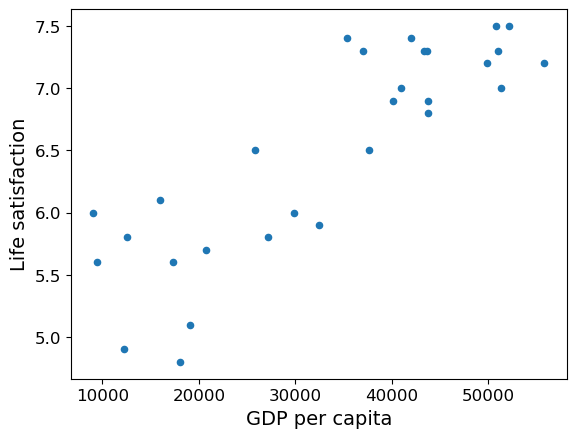

[[5.96242338]]


In [60]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [61]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]


[[5.76666667]]


Create a function to save the figures.

In [62]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = "."
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Make this notebook's output stable across runs:

In [63]:
np.random.seed(42)

# Load and prepare Life satisfaction data

If you want, you can get fresh data from the OECD's website.
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
and save it to `datasets/lifesat/`.

In [64]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [65]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to `datasets/lifesat/`.

In [66]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [67]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [68]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [69]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure regresszio_4


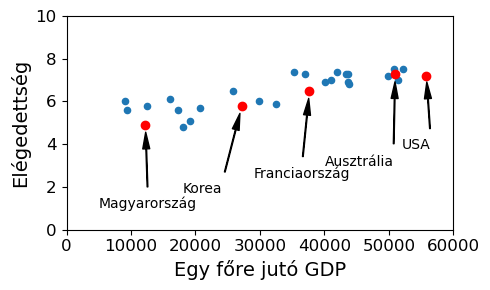

In [98]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
countries_hu = {
    "Hungary": "Magyarország",
    "Korea": "Korea",
    "France": "Franciaország",
    "Australia": "Ausztrália",
    "United States": "USA",
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country_name = countries_hu[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country_name, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")
save_fig('regresszio_4')
plt.show()

In [99]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [100]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure regresszio_11


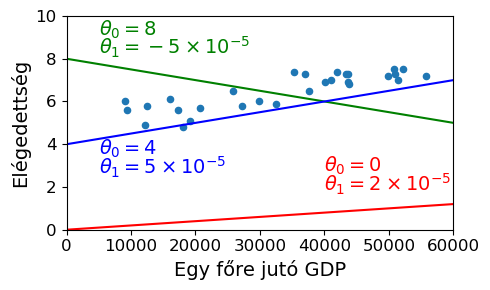

In [115]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")
save_fig('regresszio_11')
plt.show()

In [102]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158485e-05)

Saving figure regresszio_5


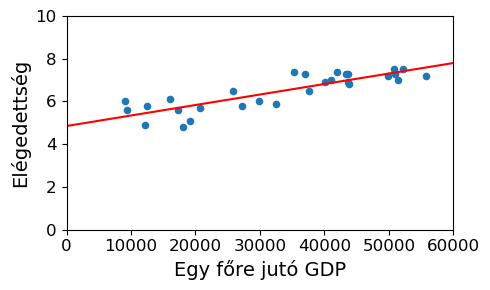

In [148]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
#plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
#plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")
save_fig('regresszio_5')
plt.show()


Saving figure regresszio_10


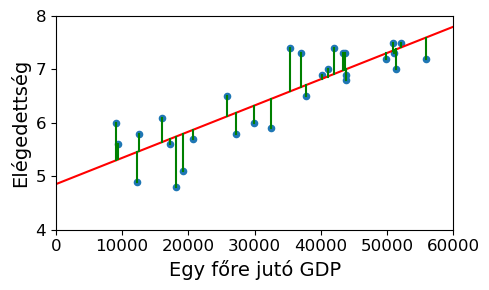

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing plot code
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")

# Plotting the residuals
for _, row in sample_data.iterrows():
    plt.plot([row['GDP per capita'], row['GDP per capita']], [row['Life satisfaction'], t0 + t1 * row['GDP per capita']], "g-")

plt.ylim([4, 8])
save_fig('regresszio_10')
plt.show()


Saving figure regresszio_7


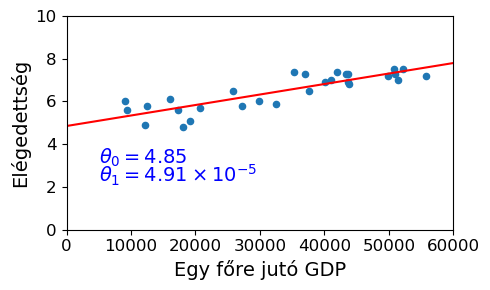

In [104]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")
save_fig('regresszio_7')
plt.show()


In [105]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.962447443188149

Saving figure regresszio_6


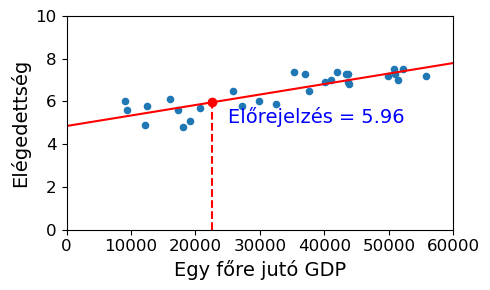

In [108]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
plt.axis([0, 60000, 0, 10])
#plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
#plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Előrejelzés = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.xlabel("Egy főre jutó GDP")
plt.ylabel("Elégedettség")
save_fig('regresszio_6')
plt.show()

In [120]:
print(x.shape)
print(y.shape)

(1000,)
(29, 1)


In [78]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [79]:
(5.1+5.7+6.5)/3

5.766666666666667

In [80]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

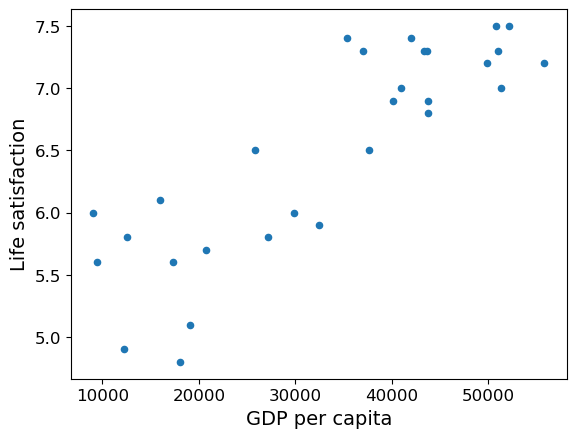

[[5.96242338]]


In [81]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [82]:
oecd_bli, gdp_per_capita = backup

In [83]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [84]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

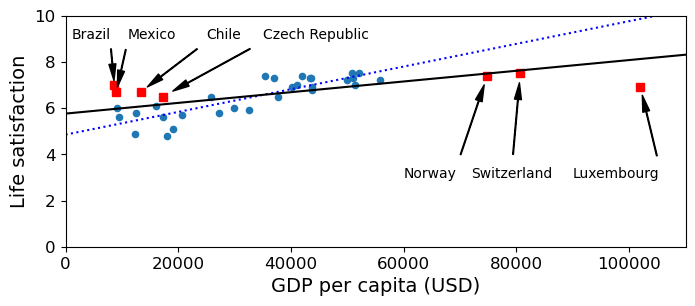

In [85]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

#save_fig('representative_training_data_scatterplot')
plt.show()

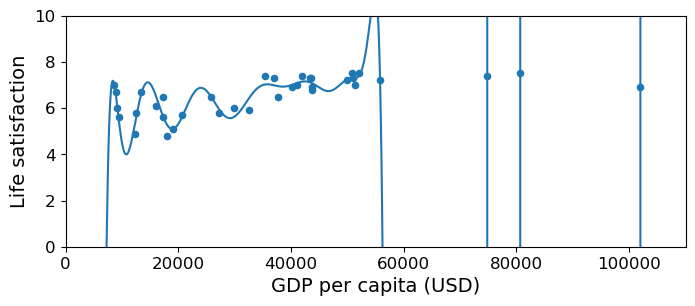

In [86]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
#save_fig('overfitting_model_plot')
plt.show()

In [87]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [88]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


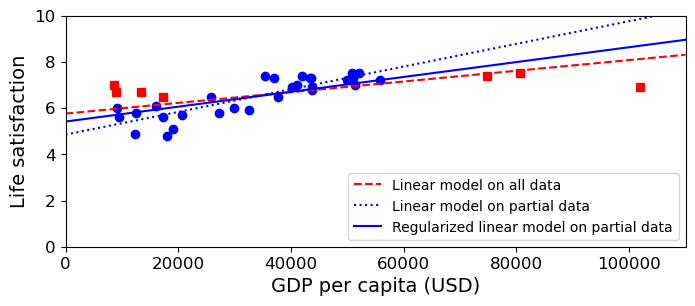

In [89]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
#save_fig('ridge_model_plot')
plt.show()

Saving figure regresszio_12


/tmp/ipykernel_664239/1566693099.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1500x500 with 0 Axes>

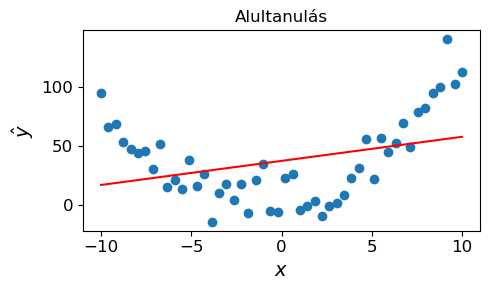

Saving figure regresszio_13


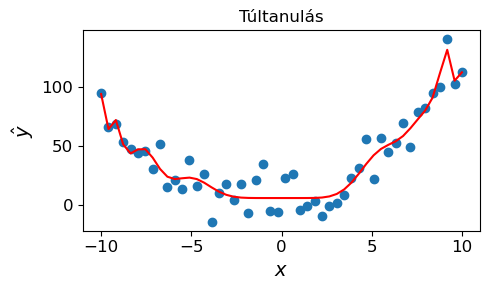

Saving figure regresszio_14


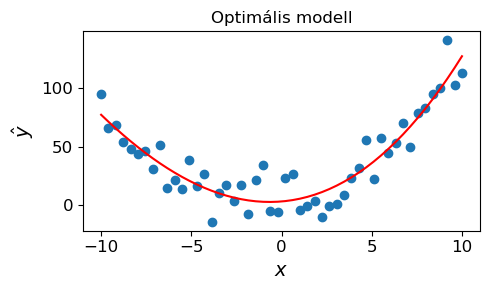

In [147]:
def generate_quadratic_data(n_points, a, b, c, noise=0.0):
    """
    Generates quadratic data points based on the equation y = ax^2 + bx + c + noise.

    :param n_points: Number of data points to generate
    :param a: Coefficient for the x^2 term
    :param b: Coefficient for the x term
    :param c: Constant term
    :param noise: Standard deviation of Gaussian noise added to y
    :return: Tuple of numpy arrays (x, y)
    """
    x = np.linspace(-10, 10, n_points)
    y = a * x**2 + b * x + c + np.random.normal(0, noise, n_points)
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return x, y

# Generate data
x, y = generate_quadratic_data(50, a=1, b=2, c=1, noise=15)


#x = np.array(country_stats['GDP per capita']).reshape(-1, 1)
#y = np.array(country_stats['Life satisfaction']).reshape(-1, 1)

# Linear model for underfitting
linear_model = LinearRegression()
linear_model.fit(x, y)
y_linear_pred = linear_model.predict(x)

# Polynomial model (high degree) for overfitting
polynomial_overfit = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
polynomial_overfit.fit(x, y)
y_poly_overfit_pred = polynomial_overfit.predict(x)

# Polynomial model (moderate degree) for optimal fit
polynomial_optimal = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
polynomial_optimal.fit(x, y)
y_poly_optimal_pred = polynomial_optimal.predict(x)

# Plotting
plt.figure(figsize=(15, 5))

# Underfitting plot
plt.figure(figsize=(5, 3))
plt.scatter(x, y)
plt.plot(x, y_linear_pred, color='red')
plt.title("Alultanulás")
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")
plt.tight_layout()
save_fig('regresszio_12')
plt.show()

# Overfitting plot
plt.figure(figsize=(5, 3))
plt.scatter(x, y)
plt.plot(x, y_poly_overfit_pred, color='red')
plt.title("Túltanulás")
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")
plt.tight_layout()
save_fig('regresszio_13')
plt.show()

# Optimal fit plot
plt.figure(figsize=(5, 3))
plt.scatter(x, y)
plt.plot(x, y_poly_optimal_pred, color='red')
plt.title("Optimális modell")
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")
plt.tight_layout()
save_fig('regresszio_14')
plt.show()

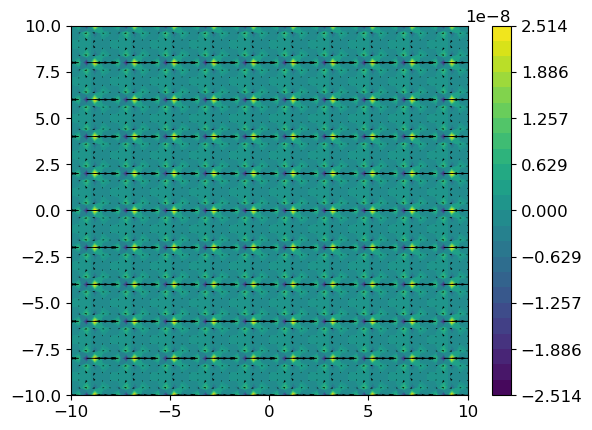

In [151]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def CD(k,l):
    #return sp.sin(2*sp.pi*k/2)/((4*sp.pi**2)*(k**2+l**2))*1e-6
    return sp.sin(2*sp.pi*k/4)/((4*sp.pi**2)*(k**2+l**2))*1e-6

def Vkl(x,y,k,l):
    return CD(k,l)*sp.sin(2*sp.pi*k*x)*sp.cos(2*sp.pi*l*y)

def V(x,y,kmax,lmax):
    k,l=sp.symbols('k l',integers=True)
    return sp.summation(Vkl(x,y,k,l),(k,1,kmax),(l,1,lmax))


#define symbolic vars, function
kmax=10
lmax=10
x,y=sp.symbols('x y')
fun=V(x,y,kmax,lmax)

#take the gradient symbolically
gradfun=[sp.diff(fun,var) for var in (x,y)]

#turn into bivariate lambda for numpy
numgradfun=sp.lambdify([x,y],gradfun,'numpy')
numfun=sp.lambdify([x,y],fun,'numpy')

#plot
X,Y=np.meshgrid(np.linspace(-10,10,51),np.linspace(-10,10,51))
graddat=numgradfun(X,Y)
fundat=numfun(X,Y)

hf=plt.figure()
hc=plt.contourf(X,Y,fundat,np.linspace(fundat.min(),fundat.max(),25))
plt.quiver(X,Y,graddat[0],graddat[1])
plt.colorbar(hc)
plt.show()

Saving figure regresszio_17


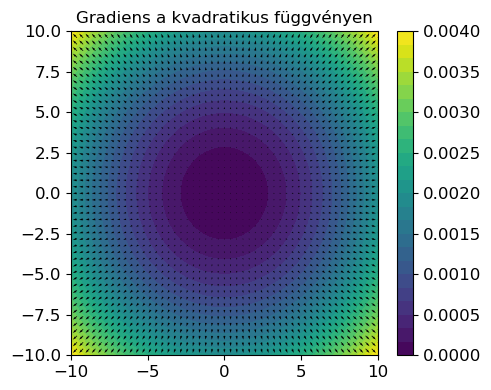

In [165]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def quadratic_function(x, y, a, b):
    return a * x**2 + b * y**2

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function symbolically
a = 0.00002
b = a
fun = quadratic_function(x, y, a, b)

# Compute the gradient symbolically
gradfun = [sp.diff(fun, var) for var in (x, y)]

# Convert to bivariate lambda functions for numpy
numgradfun = sp.lambdify([x, y], gradfun, 'numpy')
numfun = sp.lambdify([x, y], fun, 'numpy')

# Create a meshgrid for plotting
X, Y = np.meshgrid(np.linspace(-10, 10, 51), np.linspace(-10, 10, 51))

# Compute gradient data and function data
graddat = numgradfun(X, Y)
fundat = numfun(X, Y)

# Plot
hf = plt.figure(figsize=(5,4))
hc = plt.contourf(X, Y, fundat, np.linspace(fundat.min(), fundat.max(), 25))
plt.quiver(X, Y, graddat[0], graddat[1])
plt.colorbar(hc)
plt.title('Gradiens a kvadratikus függvényen')
save_fig('regresszio_17')
plt.show()
